<a href="https://colab.research.google.com/github/Viktoria574/ML/blob/main/Pract_1_TIMO_Polyakova.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Технологии и инструментарий машинного обучения*

Практическая работа № 1

Выполнил студент группы ИНБО-05-22

Полякова Виктория Владимировна

**Задание №1**

Реализовать функцию скользящего окна для заданного одномерного ряда данных,

формирующую из него матрицу по следующему правилу

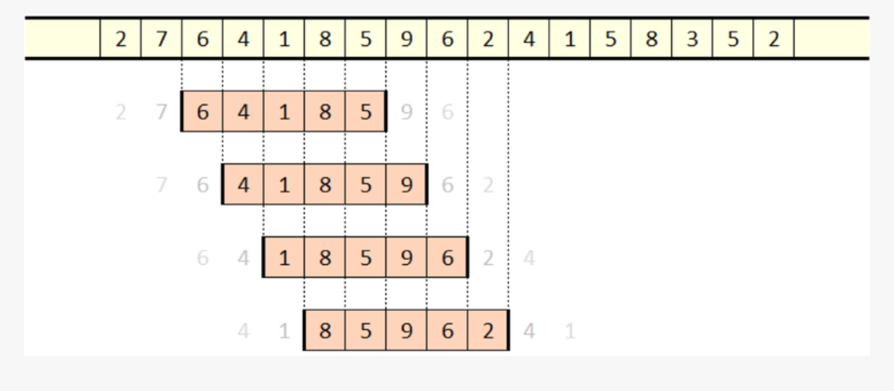

In [ ]:
#Задание 1

import numpy as np

def sliding_window(x1, w, step):
  A=[]
  for i in range(0, len(x1)-w+1, step):
    A.append(x1[i:i+w])
  return A


window = 3
step_s = 1
x1 = np.array([8, 1, 4, 5, -2, 5, 9, 0])
A1 = np.array([[8, 1, 4],
               [1, 4, 5],
               [4, 5, -2],
               [5, -2, 5],
               [-2, 5, 9],
               [5, 9, 0]])

print(np.array_equal(sliding_window(x1, w=window, step=step_s),A1))

window = 2
step_s = 4
x2 = np.array([8, 3, 4, 1, -6, 5, 9, 2, 10, 11, -14, 0])
A2 = np.array([[8, 3],
               [-6, 5],
               [10, 11]])

print(np.array_equal(sliding_window(x2, w=window, step=step_s),A2))

True
True


**Задание №2**

Необходимо ответить на вопросы по данным из репозитория UCI Adult:

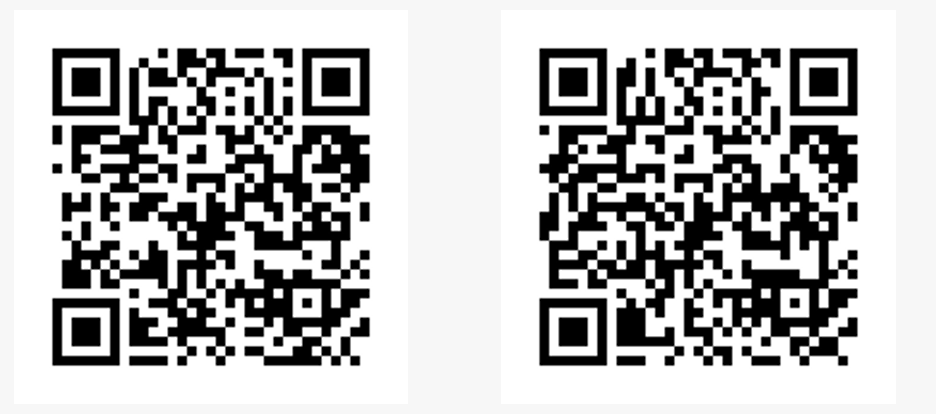

   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0             0             

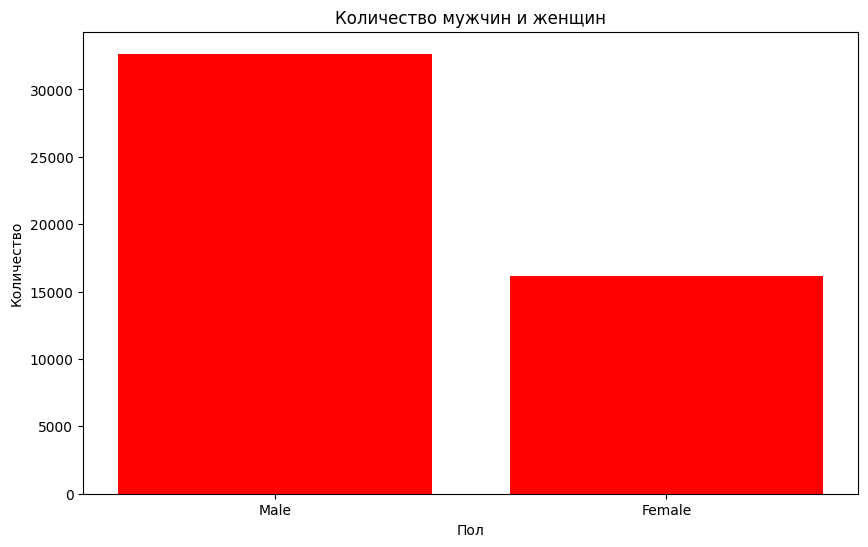

Средний возраст женщин:  36.92798913043478
Доля проживающих в Германии:  0.00421768150362393


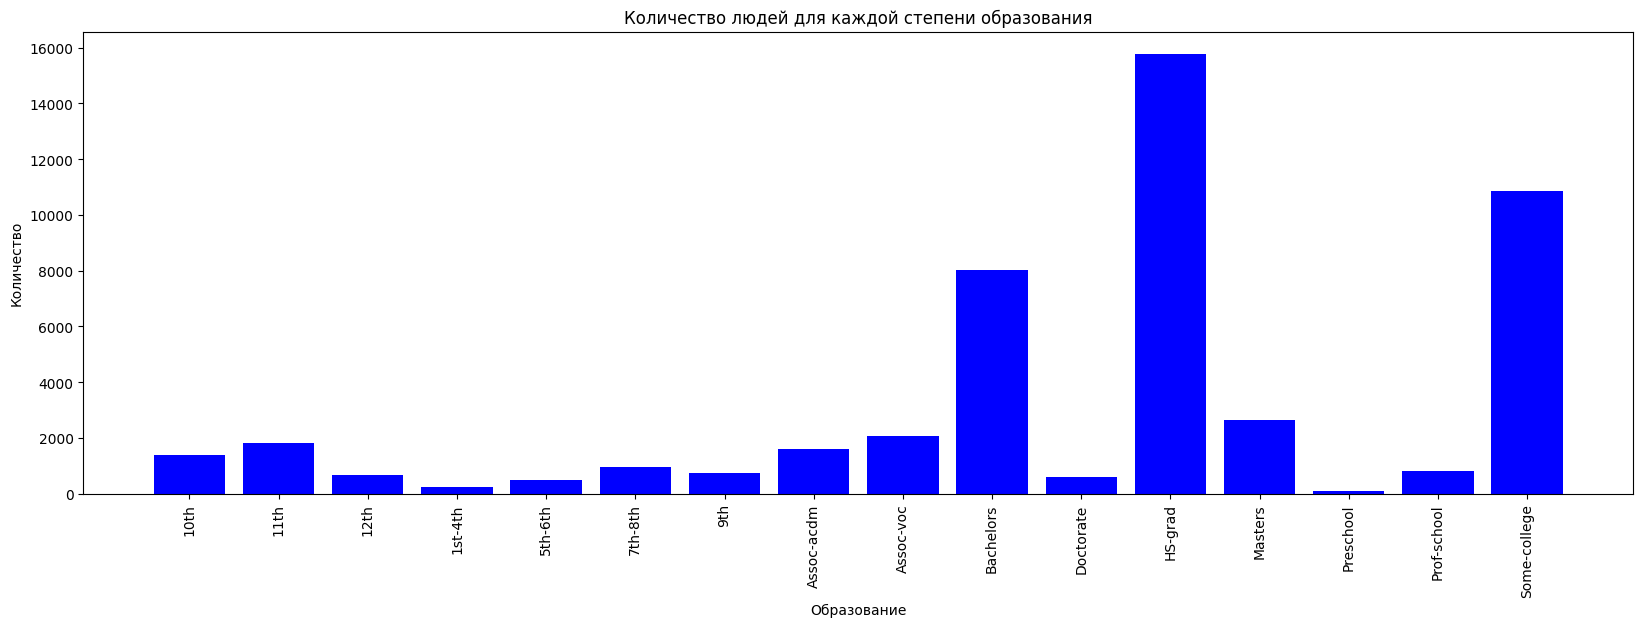

36.78373786407767  - средний возраст людей с доходом ниже 50к
14.02008849082488  - среднеквадратичное отклонение
Богатые люди не всегда образованны
Максимальный возраст по расам:
race
Amer-Indian-Eskimo    82.0
Asian-Pac-Islander    90.0
Black                 90.0
Other                 77.0
White                 90.0
Name: max, dtype: float64


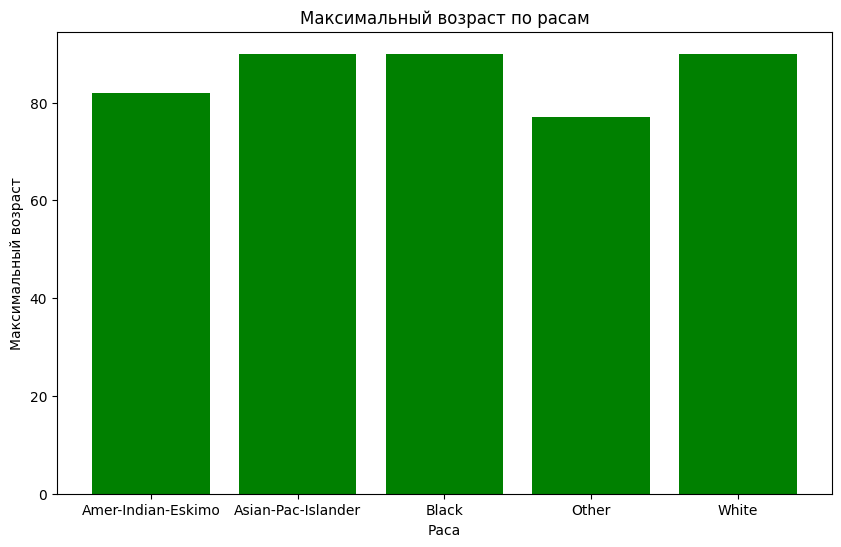

0.859074097691621  - доля женатых мужчин
0.14092590230837904  - доля холостых мужчин
99  - максимальное количество часов в неделю
Количество строк, где 'hours-per-week' равно 99: 137
0.18248175182481752  - доля хорошо зарабатывающих людей, работающих наибольшее количество часов в неделю
Среднее время работы для людей с высоким доходом по странам:
native-country
?                     45.547945
Cambodia              40.000000
Canada                45.641026
China                 38.900000
Columbia              50.000000
Cuba                  42.440000
Dominican-Republic    47.000000
Ecuador               48.750000
El-Salvador           45.000000
England               44.533333
France                50.750000
Germany               44.977273
Greece                50.625000
Guatemala             36.666667
Haiti                 42.750000
Honduras              60.000000
Hong                  45.000000
Hungary               50.000000
India                 46.475000
Iran                  47.500

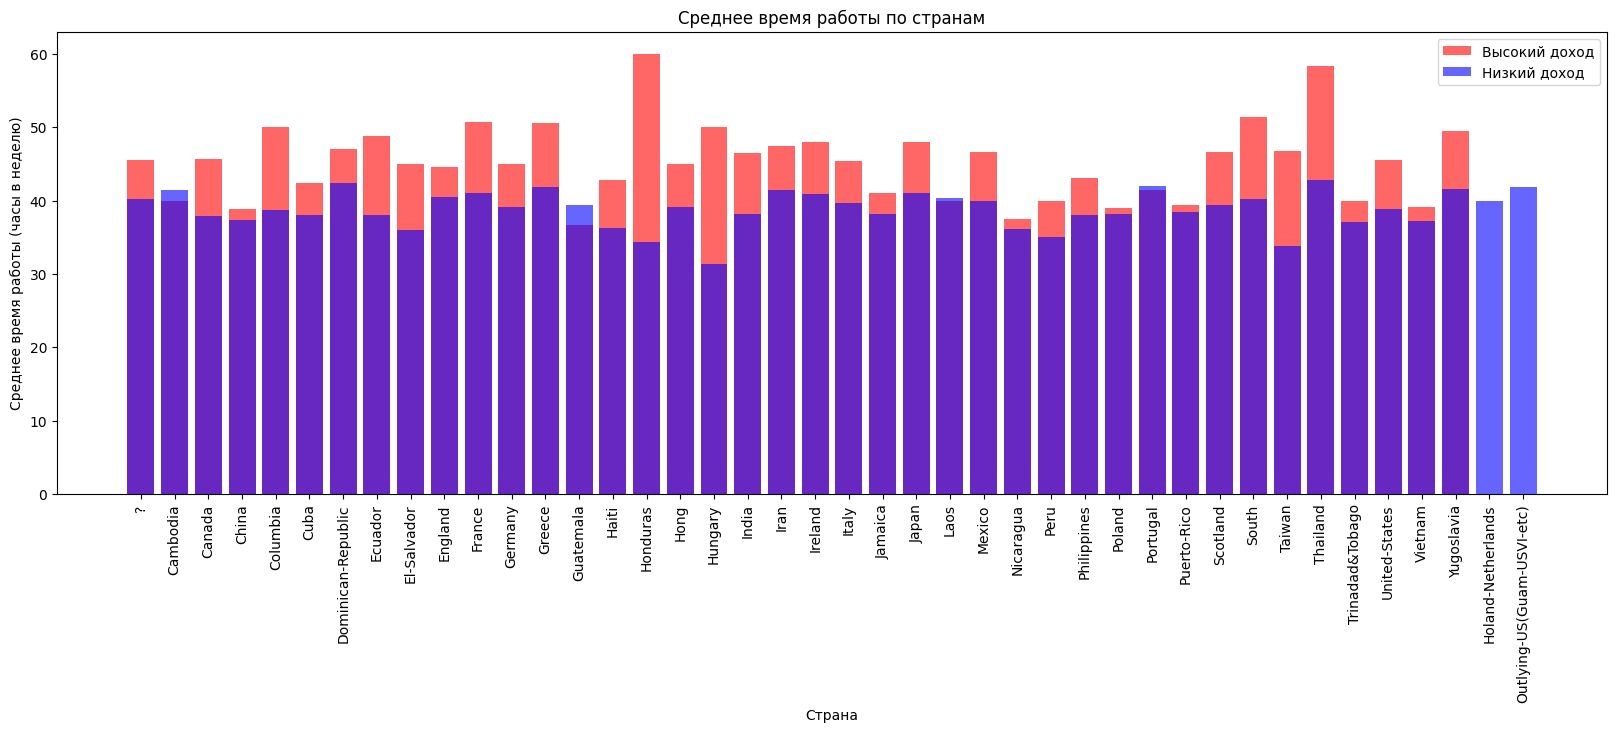

In [ ]:
#Задание 2
!pip install ucimlrepo
import pandas as pd
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo


# Загрузка набора данных
adult = fetch_ucirepo(id=2)

X = adult.data.features
y = adult.data.targets

# Объединение данных и целей в один DataFrame
df = pd.concat([X, y], axis=1)

print(df.head())
print(df.dtypes)

# Пункт 1: Подсчет количества мужчин и женщин
sex_counts = df['sex'].value_counts()
print(f"Количество мужчин и женщин: {sex_counts}")

plt.figure(figsize=(10, 6))
plt.bar(sex_counts.index, sex_counts.values, color='r')
plt.title('Количество мужчин и женщин')
plt.xlabel('Пол')
plt.ylabel('Количество')
plt.show()

# Пункт 2: Каков средний возраст (признак age) женщин?
mean_age_women = df[df['sex'] == 'Female']['age'].mean()
print("Средний возраст женщин: ", mean_age_women)


# Пункт 3: Доля проживающих в Германии
germany_part = df[df['native-country'] == 'Germany']['age'].count() / df['age'].count()
print("Доля проживающих в Германии: ", germany_part)

# Пункт 4: Подсчет количества людей для каждой степени образования
education_counts = df['education'].value_counts().sort_index()

plt.figure(figsize=(20, 6))
plt.bar(education_counts.index, education_counts.values, color='b')
plt.title('Количество людей для каждой степени образования')
plt.xlabel('Образование')
plt.ylabel('Количество')
plt.xticks(rotation=90)
plt.show()

# Пункт 5: Средний возраст и стандартное отклонение для людей с доходом ниже 50K
average_age_low_income = df[df['income'] == "<=50K"]['age'].mean()
standard_deviation_low_income = df[df['income'] == "<=50K"]['age'].std()
print(average_age_low_income, " - средний возраст людей с доходом ниже 50к")
print(standard_deviation_low_income, " - среднеквадратичное отклонение")

# Пункт 6: Проверка, всегда ли богатые люди образованны
education_level_rich_people = ['Bachelors', 'Prof-school', 'Assoc-acdm', 'Assoc-voc', 'Masters', 'Doctorate']

df['rich_education'] = (
    (df['education'].isin(education_level_rich_people)) & (df['income'] == '>50K')
) | (
    (~df['education'].isin(education_level_rich_people)) & (df['income'] == '<=50K')
)
if df['rich_education'].all():
    print('Богатые люди всегда образованны')
else:
    print('Богатые люди не всегда образованны')

# Пункт 7: Максимальный возраст по расам
race_age_stats = df.groupby('race')['age'].describe()
max_race_age = race_age_stats['max']
print("Максимальный возраст по расам:")
print(max_race_age)

plt.figure(figsize=(10, 6))
plt.bar(max_race_age.index, max_race_age.values, color='g')
plt.title('Максимальный возраст по расам')
plt.xlabel('Раса')
plt.ylabel('Максимальный возраст')
plt.show()

# Пункт 8: Доля женатых и холостых мужчин среди богатых
married_sad_men = ['Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse']
rich_married_men = (
    (df['marital-status'].isin(married_sad_men)) & (df['income'] == '>50K')
).sum()
rich_single_men = (
    (~df['marital-status'].isin(married_sad_men)) & (df['income'] == '>50K')
).sum()
rich_married_men_part = rich_married_men / (rich_married_men + rich_single_men)
rich_single_men_part = rich_single_men / (rich_married_men + rich_single_men)
print(rich_married_men_part, " - доля женатых мужчин")
print(rich_single_men_part, " - доля холостых мужчин")

# Пункт 9: Максимальное количество часов в неделю и доля хорошо зарабатывающих людей
max_hours_per_week = df['hours-per-week'].max()
print(max_hours_per_week, " - максимальное количество часов в неделю")

max_hours_per_week_count = df[df['hours-per-week'] == max_hours_per_week].shape[0]
print("Количество строк, где 'hours-per-week' равно 99:", max_hours_per_week_count)
max_hours_per_week_count_rich = (
    (df['hours-per-week'] == max_hours_per_week) & (df['income'] == '>50K')
).sum()
max_hours_per_week_part_rich = max_hours_per_week_count_rich / max_hours_per_week_count
print(max_hours_per_week_part_rich, " - доля хорошо зарабатывающих людей, работающих наибольшее количество часов в неделю")

# Пункт 10: Среднее время работы для каждой страны по отдельности для людей с высоким и низким доходом
avg_work_time_high_income = df[df['income'] == '>50K'].groupby('native-country')['hours-per-week'].mean()
avg_work_time_low_income = df[df['income'] == '<=50K'].groupby('native-country')['hours-per-week'].mean()

print("Среднее время работы для людей с высоким доходом по странам:")
print(avg_work_time_high_income)

print("Среднее время работы для людей с низким доходом по странам:")
print(avg_work_time_low_income)

plt.figure(figsize=(20, 6))
plt.bar(avg_work_time_high_income.index, avg_work_time_high_income.values, color='r', alpha=0.6, label='Высокий доход')
plt.bar(avg_work_time_low_income.index, avg_work_time_low_income.values, color='b', alpha=0.6, label='Низкий доход')
plt.title('Среднее время работы по странам')
plt.xlabel('Страна')
plt.ylabel('Среднее время работы (часы в неделю)')
plt.xticks(rotation=90)
plt.legend()
plt.show()

**Задание 3**

На основе выбранного вами датасета провести его анализ минимум по 10 признакам.

Данные взяты по ссылке:


   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  \
0          2174             0              40  United-States  <=50K   
1             0             0           

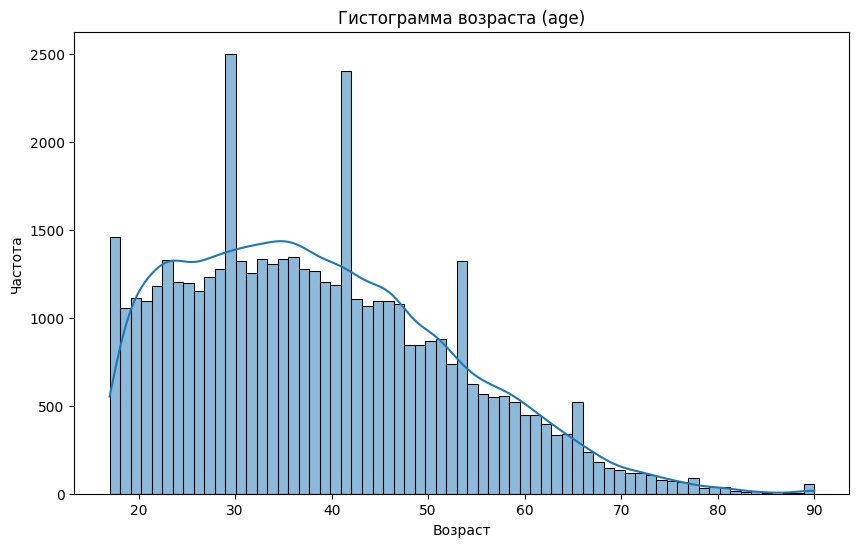

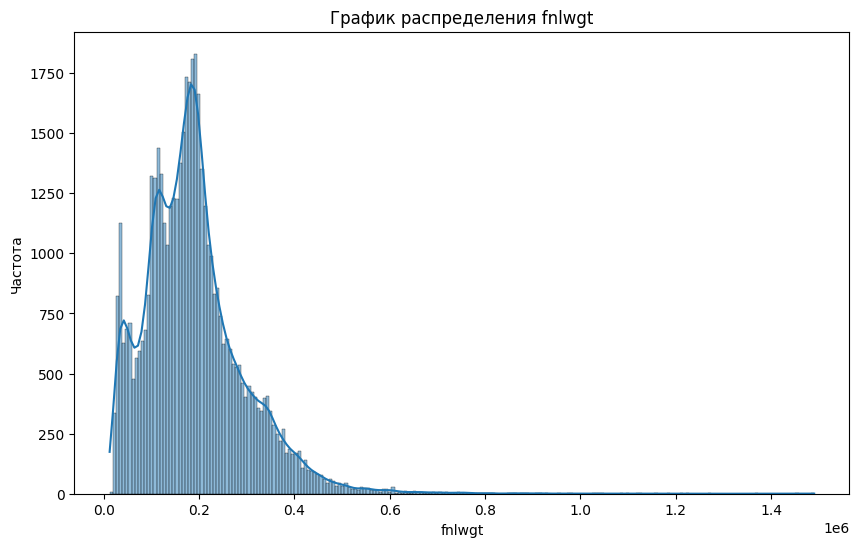

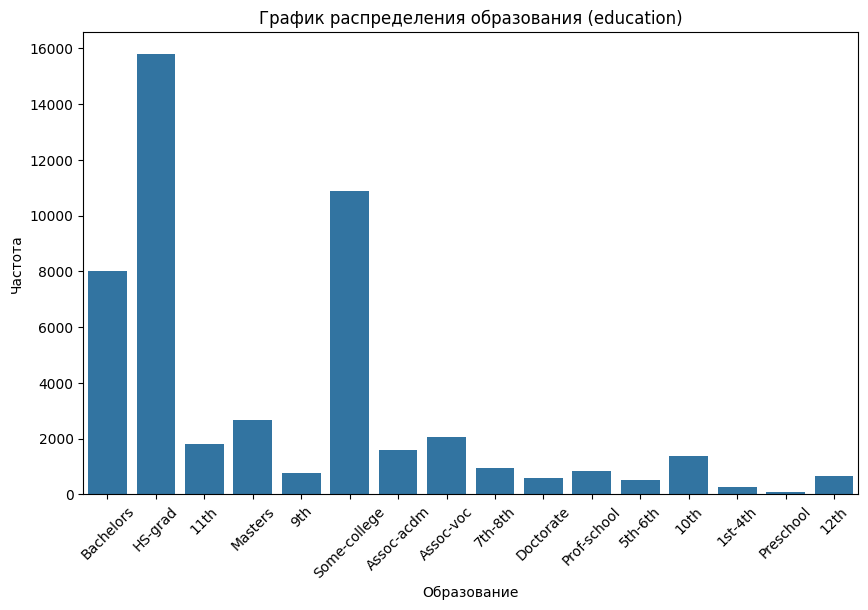

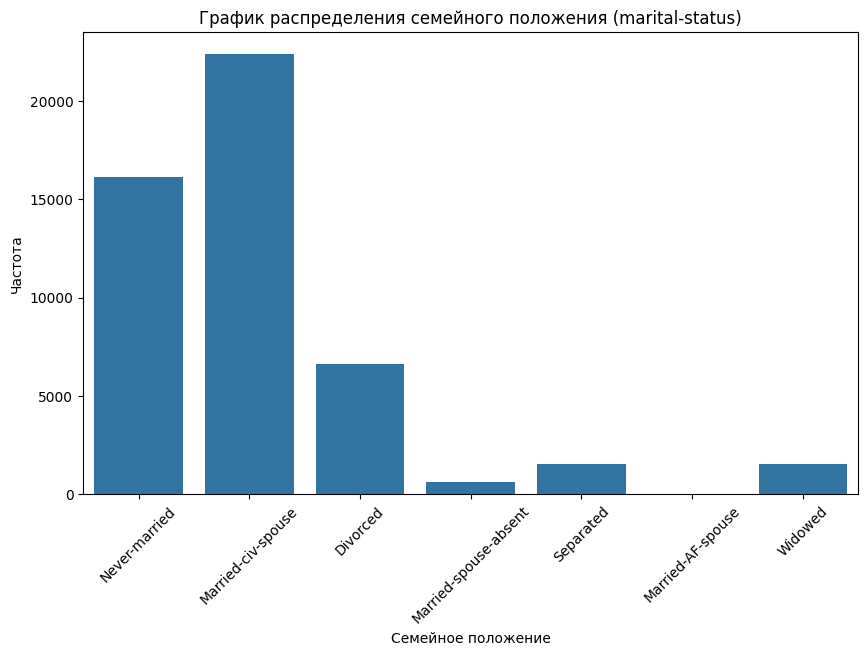

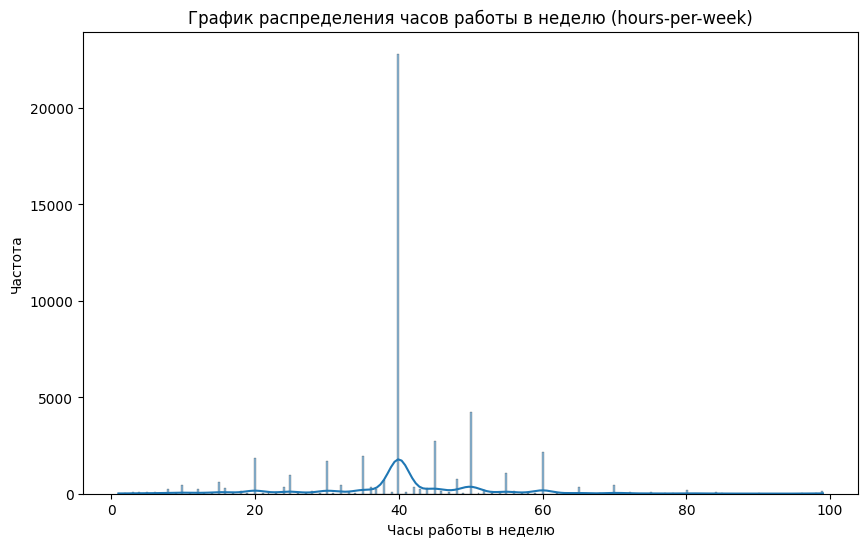

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
data = pd.read_csv('UCI_Credit_Card.csv')

print(df.head())
print(df.columns)

# №1 Подсчет медианы
median_age = df['age'].median()
print("Медиана возраста:", median_age)

# №2 Подсчет процентного соотношения всех категорий "тип работы"
workclass_counts = df['workclass'].value_counts(normalize=True) * 100
print("Процентное отношение всех категорий работы клиентов':")
print(workclass_counts)

# №3 Вывести минимальное значение для колонки "лет образование"
min_education_num = df['education-num'].min()
print("Минимальное лет образования ':", min_education_num)

# №4 Подсчет количества женщин и мужчин
gender_counts = df['sex'].value_counts()
print("Количество женщин и мужчин:")
print(gender_counts)

# №5 Средний возраст по странам
average_age_by_country = df.groupby('native-country')['age'].mean()
print("\nСредний возраст по странам:")
print(average_age_by_country)

# №6 Количество уникальных значений
unique_relationship_count = df['relationship'].nunique()
print("\nКоличество уникальных значений для семейного положения:")
print(unique_relationship_count)


# №7 Максимальный вес записи
max_fnlwgt = df['fnlwgt'].max()
print("\nМаксимальный вес записи:")
print(max_fnlwgt)

# №8 Стандартное отклонение от часов, проработанных в неделю
std_hours_per_week = df['hours-per-week'].std()
print("\nСтандартное отклонение от часов, проработанных в неделю:")
print(std_hours_per_week)

# №9 Подсчет пропущенных значений в race
missing_race_count = df['race'].isnull().sum()
print("Количество пропущенных значений в race:")
print(missing_race_count)

# №10 Подсчет медианы age
median_age = df['age'].median()
print("\nМедиана age:")
print(median_age)

# 1. Гистограмма для age
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', kde=True)
plt.title('Гистограмма возраста (age)')
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.show()

# 2. График распределения для fnlwgt
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='fnlwgt', kde=True)
plt.title('График распределения fnlwgt')
plt.xlabel('fnlwgt')
plt.ylabel('Частота')
plt.show()

# 3. График распределения для education
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='education')
plt.title('График распределения образования (education)')
plt.xlabel('Образование')
plt.ylabel('Частота')
plt.xticks(rotation=45)
plt.show()

# 4. График распределения для marital-status
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='marital-status')
plt.title('График распределения семейного положения (marital-status)')
plt.xlabel('Семейное положение')
plt.ylabel('Частота')
plt.xticks(rotation=45)
plt.show()

# 5. График распределения для hours-per-week
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='hours-per-week', kde=True)
plt.title('График распределения часов работы в неделю (hours-per-week)')
plt.xlabel('Часы работы в неделю')
plt.ylabel('Частота')
plt.show()